In [1]:
import pandas as pd
df_train = pd.read_csv("/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Training.tsv",sep="\t")
df_dev = pd.read_csv("/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Validation.tsv",sep="\t")

In [31]:
df_train

,tweet_id,text,label
0,1364778927105933315,"Psych Med Twitter, wondering if you can help. ...",0
1,1130719434526511104,@dmx_biographer @HellaChillAF I wouldn’t fuck ...,0
2,1184221813733253120,Harley is autistic.... she has the mental capa...,1
3,1435958387020341248,I just made my son cry before going to school ...,1
4,1112559025927999488,Yooooooo my dad really just said “I’d rather h...,0
...,...,...,...
7393,1232778727186223108,Just got all kinds of dirty looks for ordering...,1
7394,1174782065532780544,"anyways- if they did cause autism, i’d rather ...",0
7395,1052612940438728704,2/4 trouble at work and I could have lost my j...,0
7396,1243556662964862976,@LawyerChamber $LgiLder22 I have severe asthma...,1


In [32]:
df_dev

,tweet_id,text,label
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0
3,1107948318150152192,"@amyschumer watching #growing, my 2yo son has ...",1
4,1438320313511473154,@robbystarbuck @AmericanAir would rather a mot...,0
...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0
385,1084086161667252225,@attachedmrsL the first reply on the tweet tho...,0
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0
387,1458807608052174856,@itsadollthxng Lmfao girl !!! I’m upset fr cau...,1


In [15]:
print(len(df_train))
print(len(df_dev))

7398
389


In [2]:
df_train_div = pd.read_json('/content/drive/MyDrive/SMM4H 2024/something/train_diversities.jsonl', lines=True)
df_dev_div = pd.read_json('/content/drive/MyDrive/SMM4H 2024/something/dev_diversities.jsonl', lines=True)

In [6]:
import pickle
def load_pickle_object(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)
vectorizer_pos = load_pickle_object('/content/drive/MyDrive/SMM4H 2024/something/pos_vectorizer.pkl')

In [7]:
import numpy as np
def load_npz_file(file_path, array_index=0):
    data = np.load(file_path)
    return data[data.files[array_index]]
train_data_pos = load_npz_file('/content/drive/MyDrive/SMM4H 2024/something/pos_tf.npz')
dev_data_pos = load_npz_file('/content/drive/MyDrive/SMM4H 2024/something/pos_tf_dev.npz')

In [14]:
print(len(train_data_pos))
print(len(dev_data_pos))

373965
19039


In [16]:
import pickle
def load_pickle_object(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)
vectorizer_shape = load_pickle_object('/content/drive/MyDrive/SMM4H 2024/something/shape_vectorizer.pkl')

In [17]:
import numpy as np
def load_npz_file(file_path, array_index=0):
    data = np.load(file_path)
    return data[data.files[array_index]]
train_data_shape = load_npz_file('/content/drive/MyDrive/SMM4H 2024/something/shape_tf.npz')
dev_data_shape = load_npz_file('/content/drive/MyDrive/SMM4H 2024/something/shape_tf_dev.npz')

In [19]:
print(len(train_data_shape))
print(len(dev_data_shape))

350345
17519


In [24]:
import os
import numpy as np
import pickle
from scipy.sparse import hstack
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler
DIRECTORY = '/content/drive/MyDrive/SMM4H 2024/something/'  # Modify this path to where your files are stored
def load_npz(file_path):
    loader = np.load(file_path, allow_pickle=True)
    return loader[loader.files[0]]
def get_stylometry_features(have_svd=True):
    train_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf.npz"))
    train_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf.npz"))
    style_train = hstack([train_pos_tf, train_shape_tf])
    dev_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf_dev.npz"))
    dev_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf_dev.npz"))
    style_test = hstack([dev_pos_tf, dev_shape_tf])
    transformer = MaxAbsScaler().fit(style_train)
    style_train = transformer.transform(style_train)
    style_test = transformer.transform(style_test)
    if not have_svd:
        svd = TruncatedSVD(n_components=768)
        svd.fit(style_train)
        with open(os.path.join(DIRECTORY, "svd_768.pkl"), "wb") as file:
            pickle.dump(svd, file)
    with open(os.path.join(DIRECTORY, "svd_768.pkl"), "rb") as file:
        svd = pickle.load(file)
    style_train = svd.transform(style_train)
    style_test = svd.transform(style_test)
    return style_train, style_test
style_train, style_test = get_stylometry_features()

TypeError: MinMaxScaler does not support sparse input. Consider using MaxAbsScaler instead.

In [26]:
def get_stylometry_features(have_svd=True):
    train_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf.npz"))
    train_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf.npz"))
    style_train = hstack([train_pos_tf, train_shape_tf])
    print("Training data shape after stacking:", style_train.shape)

    dev_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf_dev.npz"))
    dev_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf_dev.npz"))
    style_test = hstack([dev_pos_tf, dev_shape_tf])
    print("Test data shape after stacking:", style_test.shape)

    transformer = MaxAbsScaler().fit(style_train)
    style_train = transformer.transform(style_train)
    style_test = transformer.transform(style_test)

    if not have_svd:
        svd = TruncatedSVD(n_components=768)
        svd.fit(style_train)
        with open(os.path.join(DIRECTORY, "svd_768.pkl"), "wb") as file:
            pickle.dump(svd, file)

    with open(os.path.join(DIRECTORY, "svd_768.pkl"), "rb") as file:
        svd = pickle.load(file)

    style_train = svd.transform(style_train)
    style_test = svd.transform(style_test)

    return style_train, style_test
style_train, style_test = get_stylometry_features()

Training data shape after stacking: (1, 724310)
Test data shape after stacking: (1, 36558)


ValueError: X has 36558 features, but MaxAbsScaler is expecting 724310 features as input.

In [28]:
def load_npz(file_path):
    """Loads a sparse matrix stored in an NPZ file and prints available arrays."""
    data = np.load(file_path, allow_pickle=True)
    print(f"Loaded {file_path}, containing arrays: {data.files}")
    return data[data.files[0]]

# Update the directory as necessary
DIRECTORY = '/content/drive/MyDrive/SMM4H 2024/something/'  # Modify this path to where your files are stored

# Testing the loading function to see outputs
train_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf.npz"))
train_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf.npz"))
dev_pos_tf = load_npz(os.path.join(DIRECTORY, "pos_tf_dev.npz"))
dev_shape_tf = load_npz(os.path.join(DIRECTORY, "shape_tf_dev.npz"))

# Checking dimensions to understand the issue better
print("Train POS TF shape:", train_pos_tf.shape)
print("Train Shape TF shape:", train_shape_tf.shape)
print("Dev POS TF shape:", dev_pos_tf.shape)
print("Dev Shape TF shape:", dev_shape_tf.shape)


Loaded /content/drive/MyDrive/SMM4H 2024/something/pos_tf.npz, containing arrays: ['indices', 'indptr', 'format', 'shape', 'data']
Loaded /content/drive/MyDrive/SMM4H 2024/something/shape_tf.npz, containing arrays: ['indices', 'indptr', 'format', 'shape', 'data']
Loaded /content/drive/MyDrive/SMM4H 2024/something/pos_tf_dev.npz, containing arrays: ['indices', 'indptr', 'format', 'shape', 'data']
Loaded /content/drive/MyDrive/SMM4H 2024/something/shape_tf_dev.npz, containing arrays: ['indices', 'indptr', 'format', 'shape', 'data']
Train POS TF shape: (373965,)
Train Shape TF shape: (350345,)
Dev POS TF shape: (19039,)
Dev Shape TF shape: (17519,)


In [29]:
from scipy.sparse import csr_matrix

def load_sparse_matrix(file_path):
    """Loads and reconstructs a sparse matrix from an NPZ file."""
    loader = np.load(file_path, allow_pickle=True)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])

# Load your training and development datasets
train_pos_tf = load_sparse_matrix(os.path.join(DIRECTORY, "pos_tf.npz"))
train_shape_tf = load_sparse_matrix(os.path.join(DIRECTORY, "shape_tf.npz"))
dev_pos_tf = load_sparse_matrix(os.path.join(DIRECTORY, "pos_tf_dev.npz"))
dev_shape_tf = load_sparse_matrix(os.path.join(DIRECTORY, "shape_tf_dev.npz"))

# Stack the features horizontally
from scipy.sparse import hstack
style_train = hstack([train_pos_tf, train_shape_tf])
style_dev = hstack([dev_pos_tf, dev_shape_tf])

print("Training combined shape:", style_train.shape)
print("Development combined shape:", style_dev.shape)


Training combined shape: (7398, 41393)
Development combined shape: (389, 41393)


In [30]:
# Scale features using MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(style_train)
style_train_scaled = transformer.transform(style_train)
style_dev_scaled = transformer.transform(style_dev)

# Optional SVD Transformation
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=768)
svd.fit(style_train_scaled)  # Fit SVD on the training data

# Transform both training and development data
style_train_final = svd.transform(style_train_scaled)
style_dev_final = svd.transform(style_dev_scaled)

print("Final training data shape:", style_train_final.shape)
print("Final development data shape:", style_dev_final.shape)


Final training data shape: (7398, 768)
Final development data shape: (389, 768)


In [33]:
train_labels = df_train['label']
dev_labels = df_dev['label']

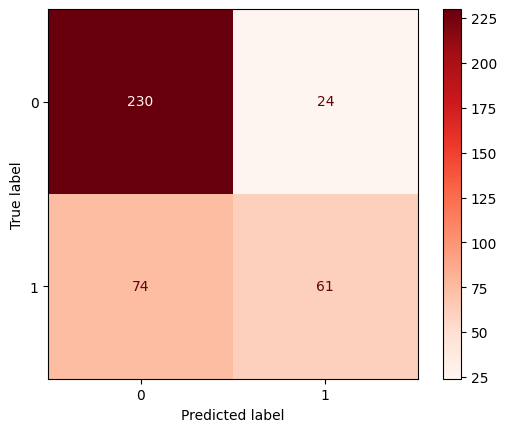

Macro Precision: 0.7371
Macro Recall: 0.6787
Macro F1 Score: 0.6895


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = LogisticRegression(max_iter=1000000)
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_LR_task5_Predictions.csv", index=False)

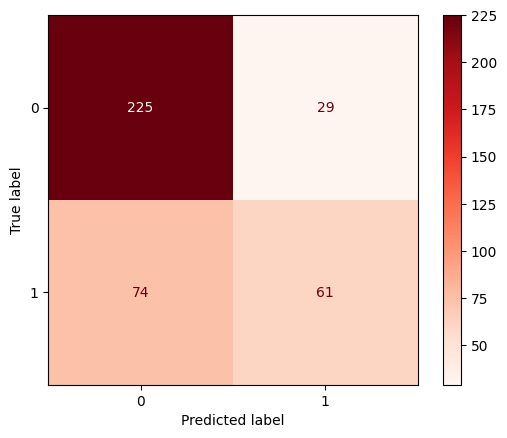

Macro Precision: 0.7151
Macro Recall: 0.6688
Macro F1 Score: 0.6780


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = SVC(kernel='linear')
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_SVM_Linear_task5_Predictions.csv", index=False)

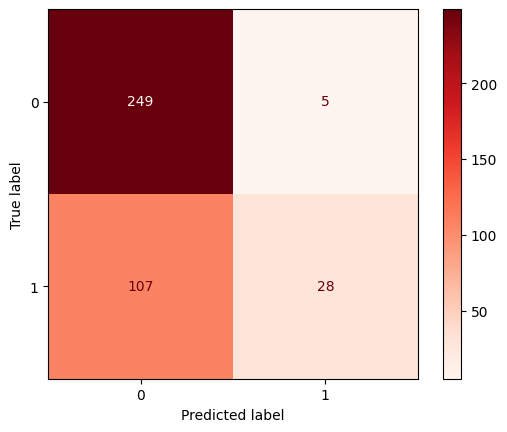

Macro Precision: 0.7740
Macro Recall: 0.5939
Macro F1 Score: 0.5749


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = SVC(kernel='poly')
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_SVM_Poly_task5_Predictions.csv", index=False)

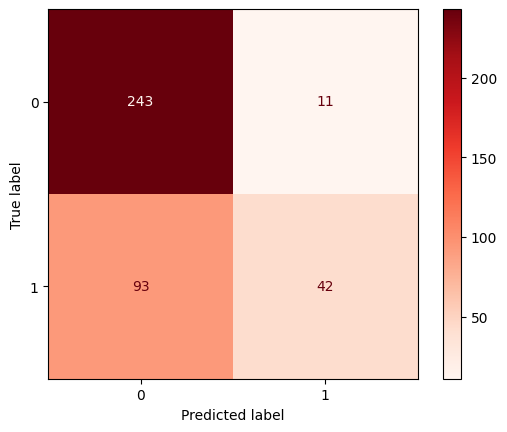

Macro Precision: 0.7578
Macro Recall: 0.6339
Macro F1 Score: 0.6353


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = SVC(kernel='rbf')
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_SVM_RBF_task5_Predictions.csv", index=False)

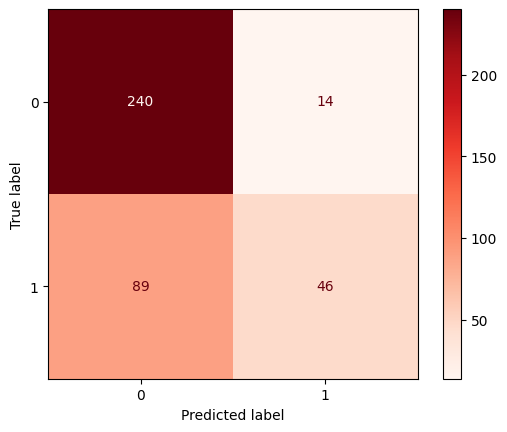

Macro Precision: 0.7481
Macro Recall: 0.6428
Macro F1 Score: 0.6476


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = SVC(kernel='sigmoid')
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_SVM_Sigmoid_task5_Predictions.csv", index=False)

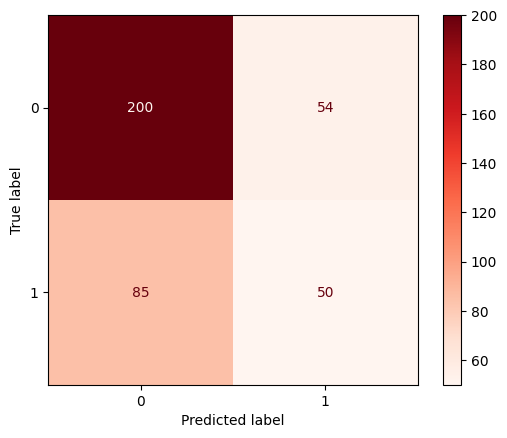

Macro Precision: 0.5913
Macro Recall: 0.5789
Macro F1 Score: 0.5803


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_DecisionTree_task5_Predictions.csv", index=False)

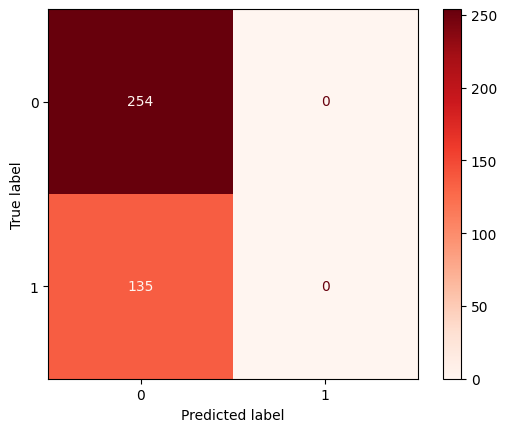

Macro Precision: 0.3265
Macro Recall: 0.5000
Macro F1 Score: 0.3950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=100, random_state=69)  # n_estimators is the number of trees
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_RandomForest_task5_Predictions.csv", index=False)

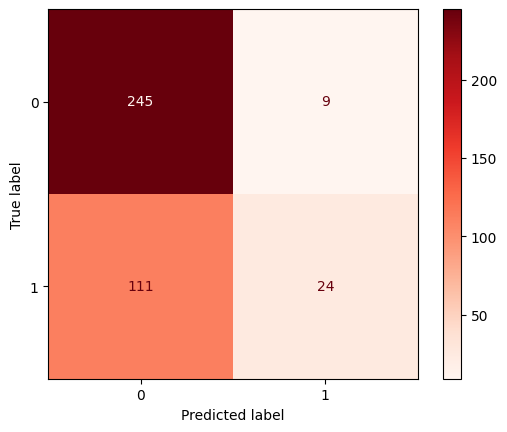

Macro Precision: 0.7077
Macro Recall: 0.5712
Macro F1 Score: 0.5445


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = GradientBoostingClassifier(n_estimators=169, learning_rate=0.1, max_depth=5, random_state=69)
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_GBM_task5_Predictions.csv", index=False)

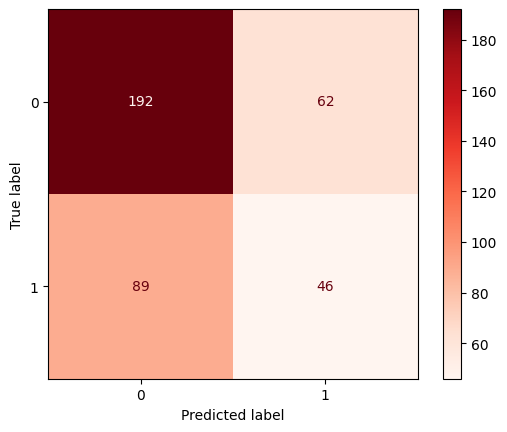

Macro Precision: 0.5546
Macro Recall: 0.5483
Macro F1 Score: 0.5482


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=1)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_1_task5_Predictions.csv", index=False)

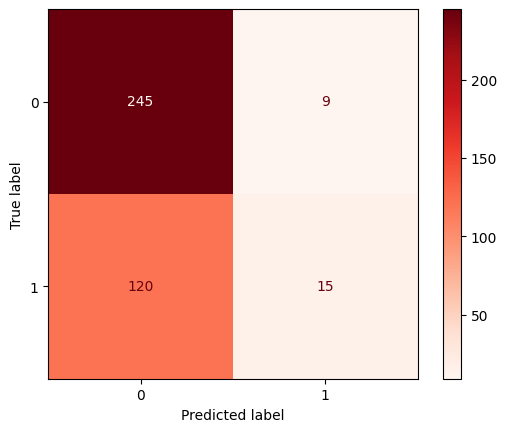

Macro Precision: 0.6481
Macro Recall: 0.5378
Macro F1 Score: 0.4901


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=2)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_2_task5_Predictions.csv", index=False)

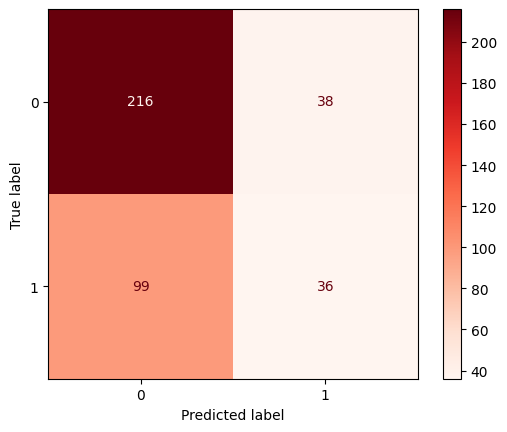

Macro Precision: 0.5861
Macro Recall: 0.5585
Macro F1 Score: 0.5519


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=3)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_3_task5_Predictions.csv", index=False)

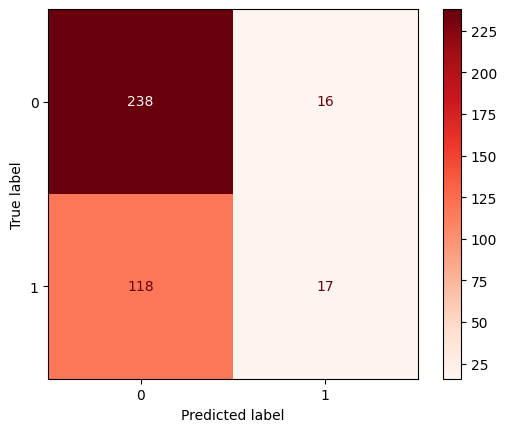

Macro Precision: 0.5918
Macro Recall: 0.5315
Macro F1 Score: 0.4914


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=4)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_4_task5_Predictions.csv", index=False)

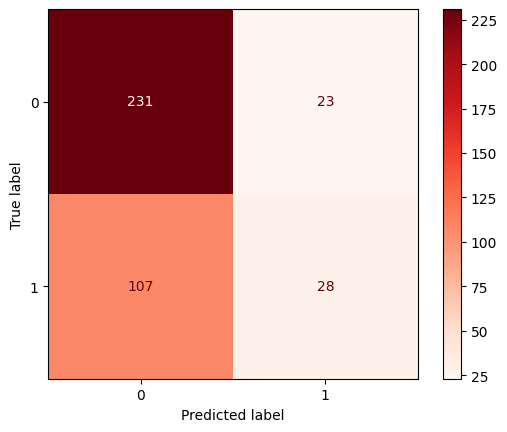

Macro Precision: 0.6162
Macro Recall: 0.5584
Macro F1 Score: 0.5407


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=5)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_5_task5_Predictions.csv", index=False)

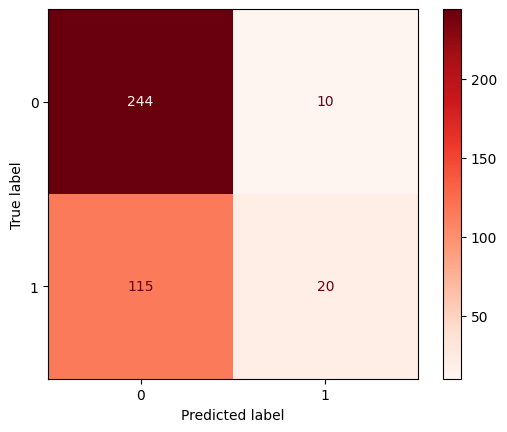

Macro Precision: 0.6732
Macro Recall: 0.5544
Macro F1 Score: 0.5193


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=6)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_6_task5_Predictions.csv", index=False)

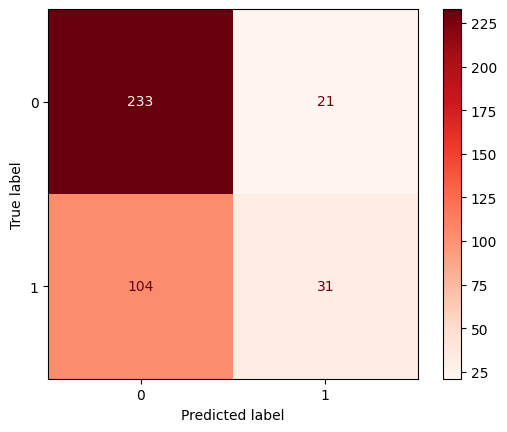

Macro Precision: 0.6438
Macro Recall: 0.5735
Macro F1 Score: 0.5600


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=7)  # 'n_neighbors' defines how many neighbors to use
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_KNN_7_task5_Predictions.csv", index=False)

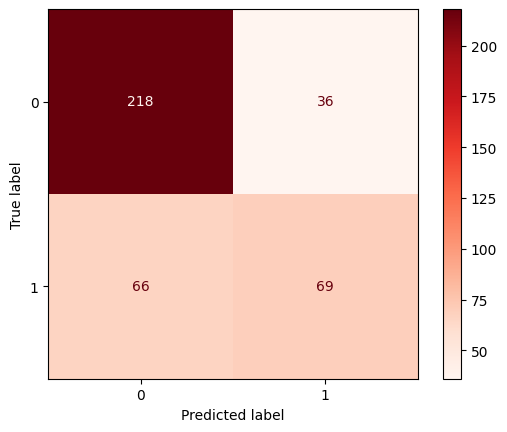

Macro Precision: 0.7124
Macro Recall: 0.6847
Macro F1 Score: 0.6927


In [93]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1690, learning_rate=1.00, max_depth=1, seed=69)
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_XGBoost_task5_Predictions.csv", index=False)

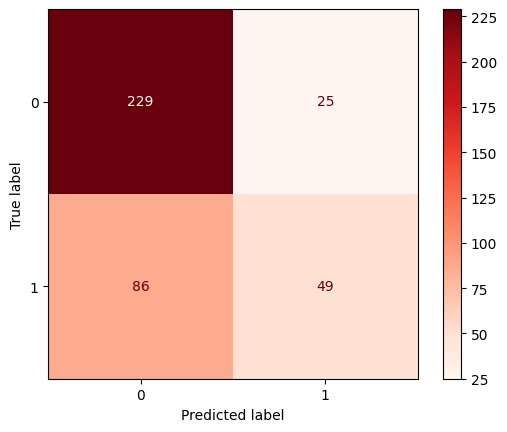

Macro Precision: 0.6946
Macro Recall: 0.6323
Macro F1 Score: 0.6369


In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=69)
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_AdaBoost_task5_Predictions.csv", index=False)

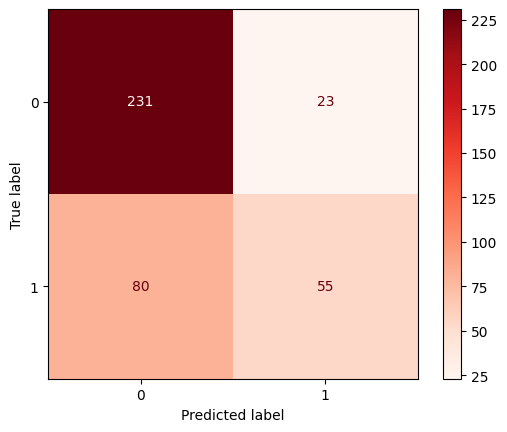

Macro Precision: 0.7239
Macro Recall: 0.6584
Macro F1 Score: 0.6671


In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=69)
model.fit(style_train_final, train_labels)
dev_predictions = model.predict(style_dev_final)
cm = confusion_matrix(dev_labels, dev_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()
print("Macro Precision: {:.4f}".format(precision_score(dev_labels, dev_predictions, average='macro')))
print("Macro Recall: {:.4f}".format(recall_score(dev_labels, dev_predictions, average='macro')))
print("Macro F1 Score: {:.4f}".format(f1_score(dev_labels, dev_predictions, average='macro')))
df_dev['predictions'] = dev_predictions
df_dev.to_csv("NN_MLP_task5_Predictions.csv", index=False)